## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**
## Questions completed: 1, 2, 6

`! git clone https://www.github.com/DS3001/assignment3`

In [ ]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor as kNNClassifier
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [ ]:
# 1. Load the ./data/car_data.csv data. Look at the head and dimensions of the data.
## load data
df = pd.read_csv('./data/car_data.csv')

## look at head of data
print(df.head())

## look at dimensions of data
df.shape

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0


(1000, 5)

In [ ]:
# 2. Summarize the variables (User.ID, Gender, Age, AnnualSalary, Purchase). Are
# there any missings to clean? Convert the Gender categorical variable into a
# dummy variable that takes the value 0 for male and 1 for female. Create a matrix
# X  of predictors including Age and AnnualSalary, and an outcome y equaling Purchase.

## Summarize variables
print("SUMMARY:\n", df.describe())

## Clean missing values
missing_values = df.isnull().sum()
print("NUMBER OF MISSING VALUES:\n", missing_values)
# Conclusion: there are no missing values

## Convert gender categorical variable
df['Gender'].value_counts()
df['g'] = 0
df.loc[ df['Gender'] == 'Female', 'g'] = 1
df['g'].value_counts()

## create matrix X
X = df.loc[:,['Age','AnnualSalary']]
y = df['Purchased']


SUMMARY:
            User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000
NUMBER OF MISSING VALUES:
 User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [ ]:
# 3. MaxMin-normalize Age and AnnualSalary in X.
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return z
X = X.apply(maxmin)

X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [ ]:
# 4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)


[ 6 16]


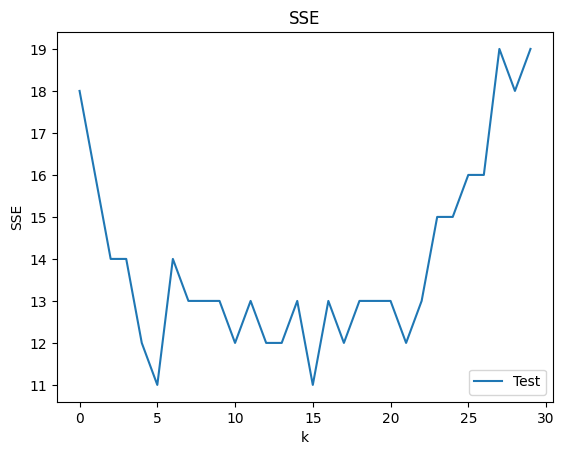

In [ ]:
# 5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer,
# classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors  k  to use.
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat) ** 2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

plt.title('SSE')
plt.show()

# Based on this graph, the optimal k value is around 8.


In [ ]:
# 6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate
# the predicted outcomes against the actual outcomes; this is called a confusion matrix. How
# often does the model predict a sale when one fails to occur? How often does the model predict
# no sale when one does occur? Overall, does it provide accurate predictions?

model = KNeighborsClassifier(n_neighbors=8)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)

pd.crosstab(y_test,y_hat)

# Looking at the cross tabulation, the model was fairly accurate with its predictions.
# There were only 6 times when 0 was incorrectly classified as 1, and only 7 times
# where 1 was classified as 0. This leads to a total of 13 incorrect predictions out of
# 200 cases, which equals to 0.07 proportion of cases (13/200). That means that the
# overall accuracy is 0.93 proportion of cases, which is fairly high.


col_0,0,1
Purchased,,
0,119,6
1,7,68


In [ ]:
# 7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions
# for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

vars = ['Age', 'AnnualSalary', 'Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

model = KNeighborsClassifier(n_neighbors=8)
fitted_model = model.fit(X_train.drop('Gender', axis=1), y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']


In [ ]:
pd.crosstab(y_F,y_hat_F)

col_0,0,1
Purchased,,
0,59,3
1,14,33


In [ ]:
pd.crosstab(y_M,y_hat_M)

# For women, it looks like with using 8 neighbors, 92/109=0.8440 are correct.
# For men, 78/91=0.8571 are correct. So, it seems like the model does slightly
# better with predicting what a male customer would do rather than a female customer.
# However, this difference is quite small, so I still believe the the model does a
# fairly good job with predicting actions of both the male and female population.

col_0,0,1
Purchased,,
0,60,3
1,10,18


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
# 1. Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price,
# year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.

# Keep only price, year, and mileage:
df_USA=pd.read_csv('./data/USA_cars_datasets.csv')
df_USA = df_USA[['price', 'year', 'mileage']]

# NA handling
missing_vals = df_USA.isnull().sum()
print("Missing values:\n", missing_vals)
# NO MISSING VALUES

# head and dimensions of data
print("Head: \n", df_USA.head())
print("Dimensions:\n", df_USA.shape)

Missing values:
 price      0
year       0
mileage    0
dtype: int64
Head: 
    price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Dimensions:
 (2499, 3)


In [ ]:
#2. Maxmin normalize year and mileage.
## Maxmin function was made earlier in question 1.

df_USA[['year', 'mileage']] = df_USA[['year', 'mileage']].apply(maxmin)
print(df_USA.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


In [ ]:
# 3. Split the sample into ~80% for training and ~20% for evaluation.
X = df_USA.loc[:,['year', 'mileage']]
y = df_USA['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

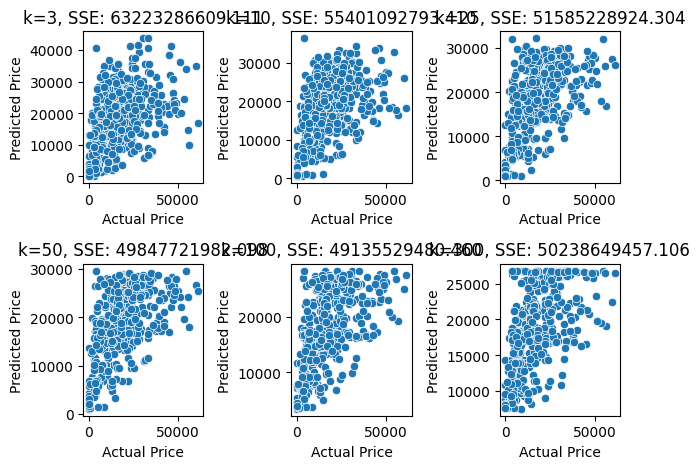

In [ ]:
# 4. Use the  k NN algorithm for regression and the training data to predict price
# using year and mileage for the test set for  k=3,10,25,50,100,300 . For each value
# of  k , compute the Sum of Squared Error and make a scatterplot showing the test
# value plotted against the predicted value. What patterns do you notice as you increase k ?
k_vals = [3, 10, 25, 50, 100, 300]
res = []

# use kNN regression & compute SSE
for i, k in enumerate(k_vals):
  knn_reg = KNeighborsRegressor(n_neighbors=k)
  knn_reg.fit(X_train, y_train)
  y_pred = knn_reg.predict(X_test)
  SSE = ((y_test - y_pred) ** 2).sum()
  res.append((k, SSE, y_test, y_pred))

  plt.subplot(2, 3, i + 1)
  plotvar = sns.scatterplot(x=y_test,y=y_pred)
  plotvar.set(xlabel='Actual Price', ylabel='Predicted Price')
  plotvar.set_title(f'k={k}, SSE: {SSE:.3f}')

plt.tight_layout()
plt.show()

[44]


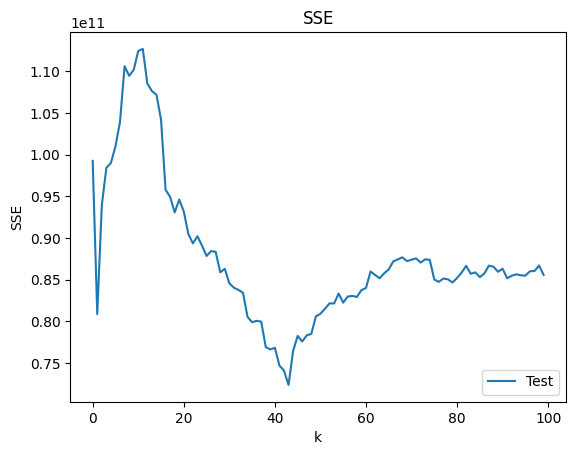

In [ ]:
# 5. Determine the optimal  k  for these data.
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat) ** 2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

plt.title('SSE')
plt.show()
# According to the graph, the optimal k value is 44.

#### 6. Describe what happened in the plots of predicted versus actual prices as  k  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)
When the chosen k-value is too small, underfitting will occur, meaning the model will not be that accurate. This means that the model is not developed enough to make a close enough prediction. On the other hand, if the chosen k-value is too large, overfitting will occur, and the model will still be inaccurate. This means that the model is too developed, and the predictions will still be lacking in accuracy because it is too refined. This can be seen in the data, where the k-value that minimizes error isn't too large nor too small, preventing any over/underfitting.


**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [ ]:
# 1. Run code:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

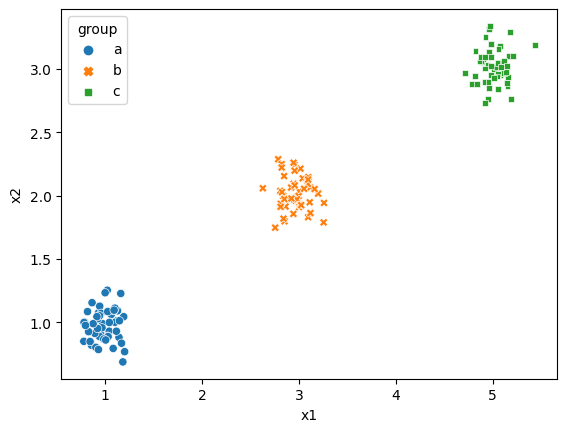

In [ ]:
# 2. Make scatterplots of the  (X1,X2)  points by group for each of the datasets. As the
# noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
sns.scatterplot(data = df0_125,x='x1',y='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

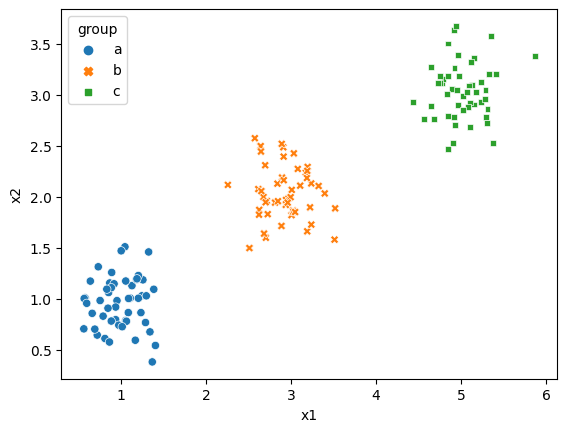

In [ ]:
sns.scatterplot(data = df0_25,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

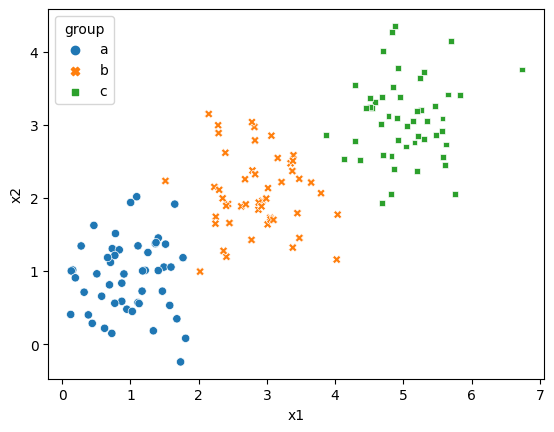

In [ ]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

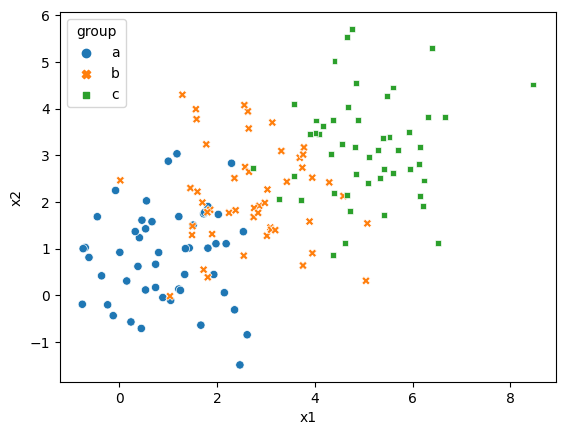

In [ ]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

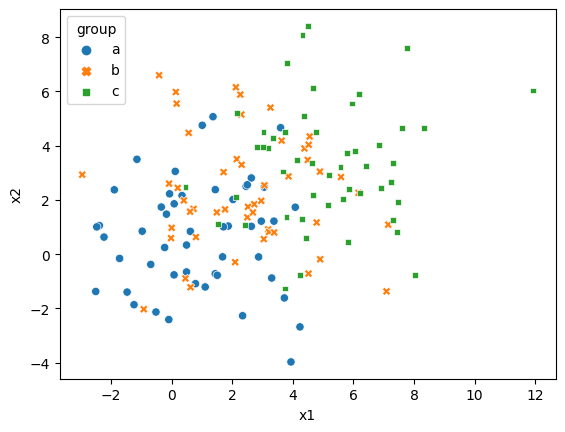

In [ ]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')
# As the noise increases, it can be seen that the visual distinctness of the clusters decrease.
# The points of each cluster begins to spread out more and more, making it harder to visually see the separation.

In [ ]:
# 3. Create a scree plot for each of the datasets. Describe how the level of noise
# affects the scree plot (particularly the presence of a clear "elbow") and your
# ability to definitively select a  k .

def scree(data):
  X = data.loc[ : , ['x1', 'x2'] ]
  X = X.apply(maxmin)
  k_bar = 15
  k_grid = np.arange(1,k_bar+1)
  SSE = np.zeros(k_bar)
  for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
  axes.set_ylim(0,35)

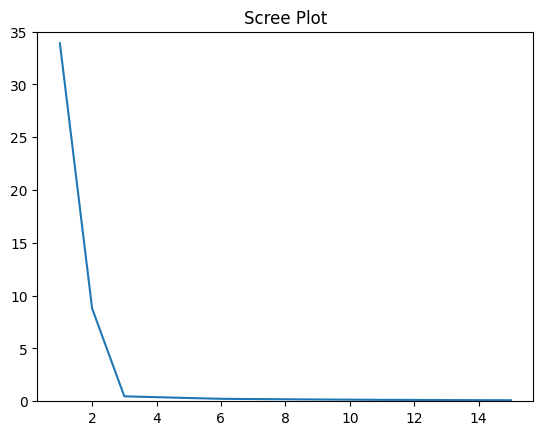

In [ ]:
scree(data = df0_125) # elbow at k=3, very obvious

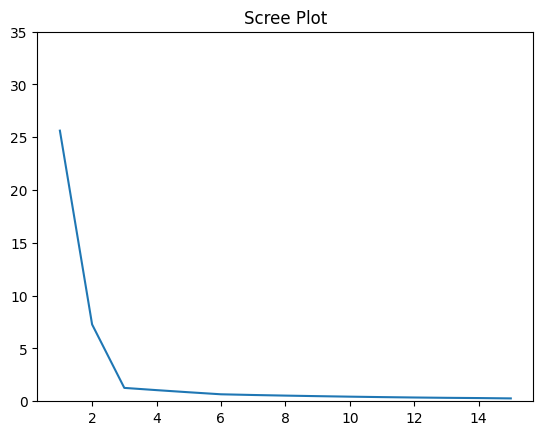

In [ ]:
scree(data = df0_25) # elbow at k=3, very obvious

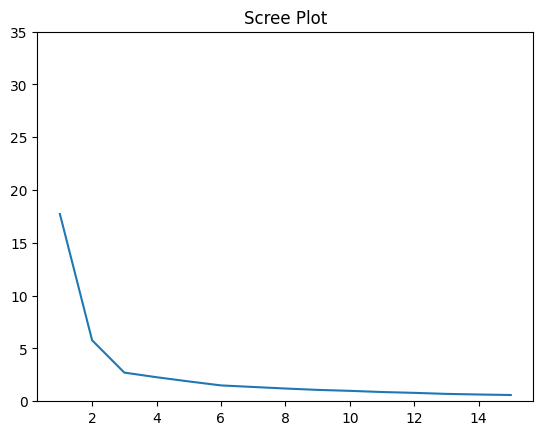

In [ ]:
scree(data = df0_5) # elbow at k=3, less, but still obvious

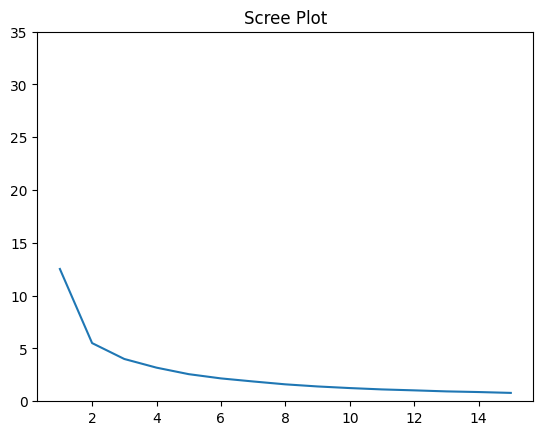

In [ ]:
scree(data = df1_0) # elbow at k=2, hard to tell

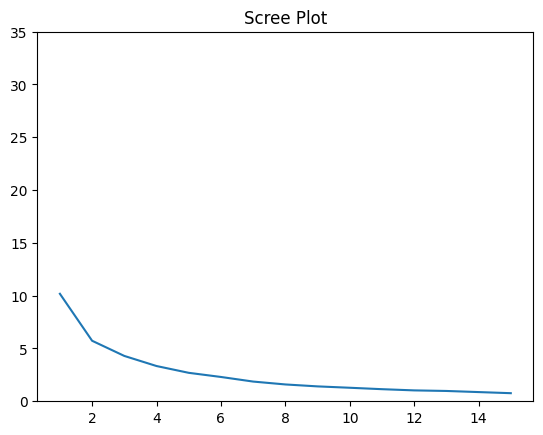

In [ ]:
scree(data = df2_0) # elbow might be at k=2, not very obvious/ no strict elbow shown

### 4. Explain the intuition of the elbow, using this numerical simulation as an example.

If the given clusters are separated and easier to identify, using a scree plot will allow you to easily see where the elbow k-value is. The more vague the clusters are, the smoother the plot will be, making it far more difficult to identify where the elbow k-value is.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?